In [ ]:
# Mohammad Ali Zahir
# Student ID: 40077619
# COMP 333 - Data Analytics
# Objective: Create a Jupyter notebook using Python and its libraries, to analyse the Titanic dataset 
# using EDA to develop a story about the survival of children aboard the Titanic. Markup
# the notebook so it contains the content of your four-slide story embedded in the notebook.
# Output: Visualization and the story telling of the story-telling PDF 

# Librairies

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# Situation

Many lives were lost in the crash of the large ship called the Titanic in 1912. Our goal for analyzing the data would be to find any patterns which caused the crash and then we may be able to determine some new safety measures to prevent the repeat of a crash of this magnitude.

In [18]:
# Loading the dataset 

df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Seperate the dead passengers vs the passengers who survived
survived_passengers = len(df[df['Survived'] ==1])
dead_passengers = len(df["Survived"]) - survived_passengers

table_data = [
    ["Data", "Value"],
    ["Survived Passengers", survived_passengers],
    ["Dead Passengers", dead_passengers]
]

# Use tabulate to format the table as a string
table_str = tabulate(table_data, headers="firstrow", tablefmt="grid")

# Print the formatted table string
print(table_str)


+---------------------+---------+
| Data                |   Value |
+=====================+=========+
| Survived Passengers |     342 |
+---------------------+---------+
| Dead Passengers     |     549 |
+---------------------+---------+


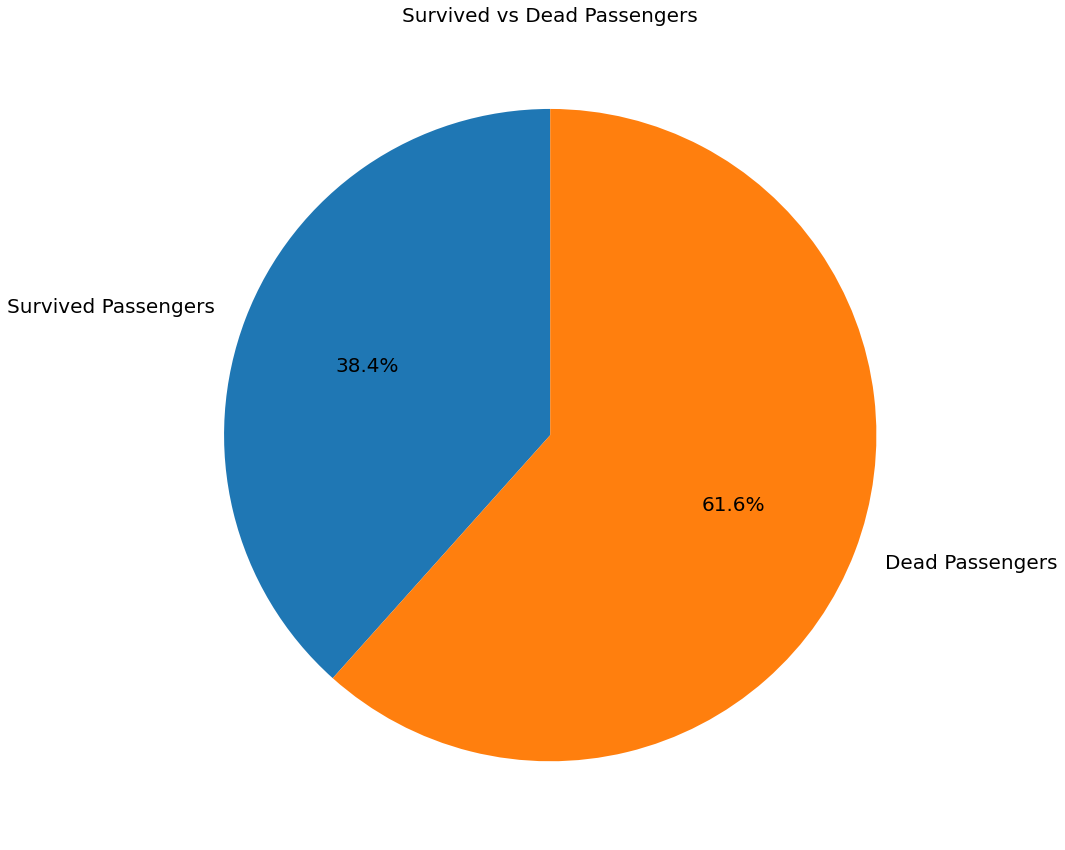

In [28]:
# Calculate the percentage of survived and dead passengers
survived_percentage = round(survived_passengers / len(df) * 100, 2)
dead_percentage = round(dead_passengers / len(df) * 100, 2)

# Create a list of the values for the pie chart
pie_values = [survived_passengers, dead_passengers]

# Create a list of the labels for the pie chart with percentage
pie_labels = [
    f"Survived Passengers",
    f"Dead Passengers"
]

# Create the pie chart
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(pie_values, labels=pie_labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 20})

# Set the background color of the figure to white
fig.patch.set_facecolor('white')

# Add a title to the pie chart
ax.set_title("Survived vs Dead Passengers", fontdict={'size': 20})

# Display the pie chart
plt.show()

# Problem

We want to find the variables which may or may not have contributed to the survival of children in the crash. Here we will decide that anyone aged 13 or below is considered to be a child.

In [45]:
# Seperate the child from the adults
child_passengers = df[df['Age'] <=13]
adult_passengers = df[df['Age'] >13]

table_data = [
    ["Data", "Value"],
    ["Child Passengers", len(child_passengers)],
    ["Adult Passengers", len(adult_passengers)]
]

# Use tabulate to format the table as a string
table_str = tabulate(table_data, headers="firstrow", tablefmt="grid")

# Print the formatted table string
print(table_str)

+------------------+---------+
| Data             |   Value |
+==================+=========+
| Child Passengers |      71 |
+------------------+---------+
| Adult Passengers |     643 |
+------------------+---------+


In [51]:
# Seperate the dead children vs the alive children
alive_children = len(child_passengers[child_passengers["Survived"] ==1])
dead_children = len(child_passengers) - alive_children

table_data = [
    ["Data", "Value"],
    ["Children Alive", alive_children],
    ["Children Dead", dead_children]
]

# Use tabulate to format the table as a string
table_str = tabulate(table_data, headers="firstrow", tablefmt="grid")

# Print the formatted table string
print(table_str)

+----------------+---------+
| Data           |   Value |
+================+=========+
| Children Alive |      42 |
+----------------+---------+
| Children Dead  |      29 |
+----------------+---------+


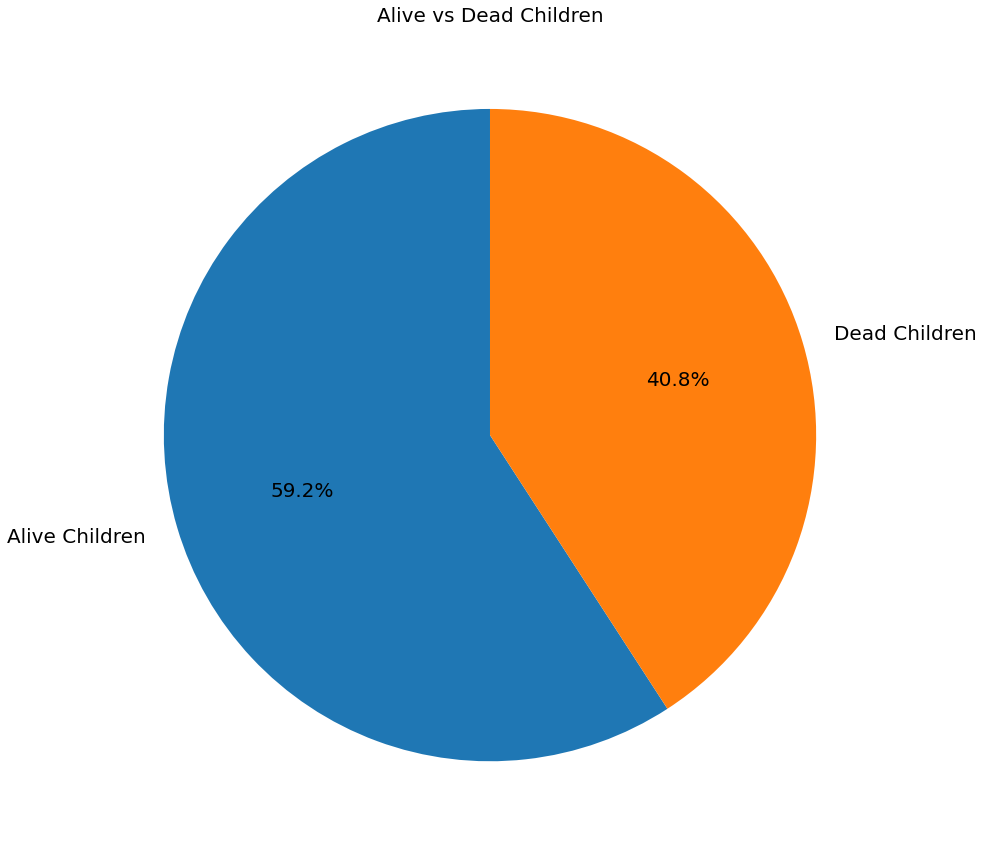

In [52]:
# Calculate the percentage of survived and dead passengers
survived_percentage = round(alive_children / len(df) * 100, 2)
dead_percentage = round(dead_children / len(df) * 100, 2)

# Create a list of the values for the pie chart
pie_values = [alive_children, dead_children]

# Create a list of the labels for the pie chart with percentage
pie_labels = [
    f"Alive Children",
    f"Dead Children"
]

# Create the pie chart
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(pie_values, labels=pie_labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 20})

# Set the background color of the figure to white
fig.patch.set_facecolor('white')

# Add a title to the pie chart
ax.set_title("Alive vs Dead Children", fontdict={'size': 20})

# Display the pie chart
plt.show()

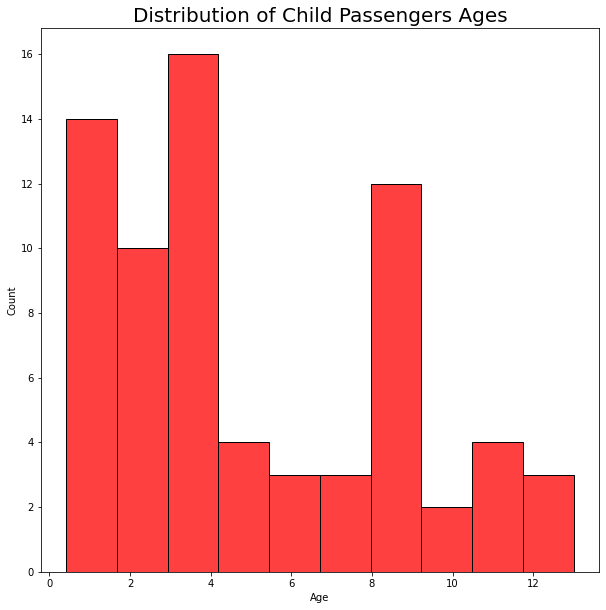

In [55]:
# We would create a histogram of the distribution of children
plt.figure(figsize=(10,10))
sns.histplot(data=child_passengers, x='Age', bins=10, color='red')
plt.title('Distribution of Child Passengers Ages', fontdict={'size':20})
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()